In [1]:
from pandarallel import pandarallel
pandarallel.initialize()
import matplotlib.pyplot as plt

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
import pandas as pd
data = pd.read_csv('train.gz', compression='gzip',
                   error_bad_lines=False)
data.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
40428962,9.998753e+18,1,14103023,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17262,320,50,1872,3,39,100173,23
40428963,9.999038e+18,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,2,23160,320,50,2667,0,47,-1,221
40428964,9.999585e+18,0,14103023,1005,1,f61eaaae,6b59f079,f028772b,ecad2386,7801e8d9,...,1,0,20969,320,50,2372,0,813,-1,46
40428965,9.999636e+18,1,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,3c4b944d,2347f47a,...,1,0,16859,320,50,1887,3,39,100194,23
40428966,9.999747e+18,0,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22257,320,50,2545,0,431,100084,221


In [4]:
sample = data[['click','hour']]

In [7]:
import datetime
sample['hour']  = data['hour'] .parallel_apply(lambda x: pd.to_datetime(str(x), format='%y%m%d%H'))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
sample.set_index('hour', inplace=True)

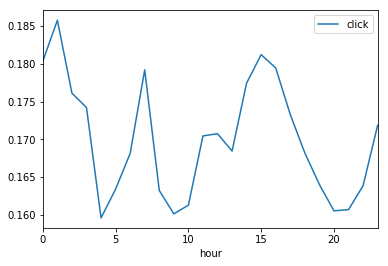

In [9]:
sample.groupby(sample.index.hour).mean().plot()
#aggregated by mean.

In [10]:
hour_mean = sample.groupby(sample.index.hour).mean()
hour_mean.head(4)

,click
hour,
0,0.180351
1,0.185774
2,0.176108
3,0.174199


In [11]:
rolling_mean = hour_mean.rolling(window=3).mean()

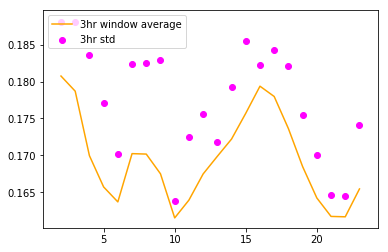

In [19]:
rolling_standard = hour_mean.rolling(window=3).mean() + 1.5 * hour_mean.rolling(window=3).std() 
#plt.plot(x = sample.index.hour, y = sample['click'], label='click')
plt.plot(sample.index.hour.unique(), rolling_mean, label='3hr window average', color='orange')
plt.scatter(sample.index.hour.unique(), rolling_standard  , label='3hr std ', color='magenta')
plt.legend(loc='upper left')
plt.show()
 
 